# Thực hành Khai thác dữ liệu - Tuần 9
Họ và tên : Nguyễn Tiến Phong \
MSSV : 20280071

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
plt.style.use('seaborn-whitegrid')
from scipy import stats
from ipywidgets import interact, fixed
from sklearn.datasets import make_blobs, make_circles
import warnings
warnings.filterwarnings("ignore")

C:\Users\USER\AppData\Local\Temp\ipykernel_14736\643377523.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


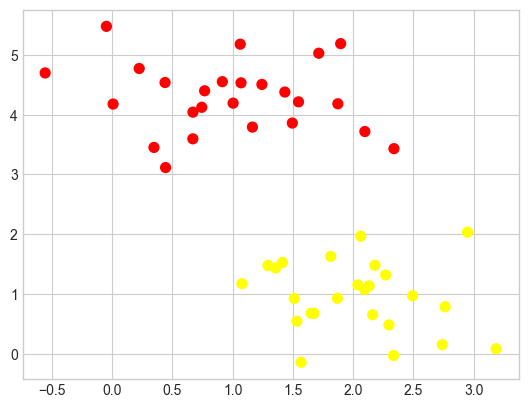

In [2]:
# Khởi tạo tập dữ liệu có 50 điểm và 2 cụm
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

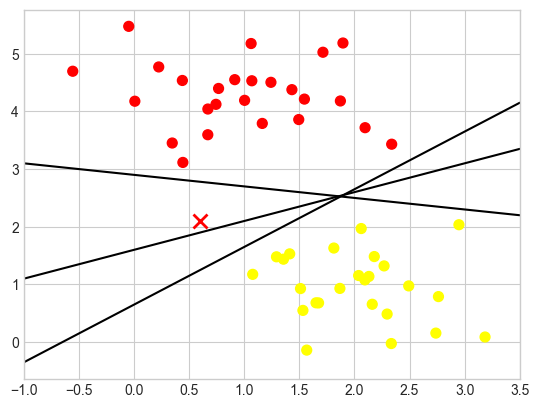

In [3]:
# Vẽ đường thẳng phân tích 2 cụm
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)
plt.show()

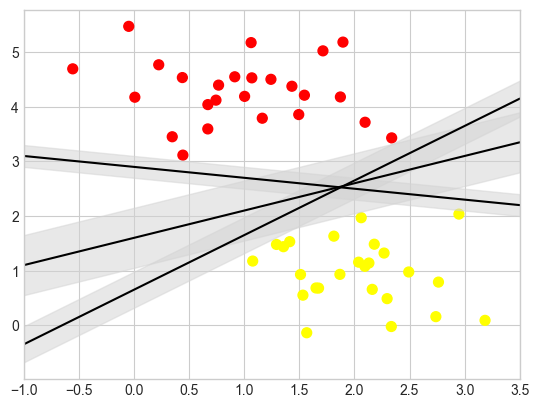

In [4]:
# Vẽ siêu phẳng lề lớn nhất
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')



for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='lightgray', alpha=0.5)
    
plt.xlim(-1, 3.5)
plt.show()

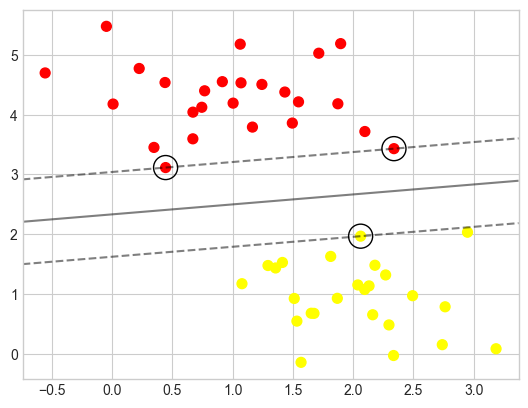

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [5]:
# Sử dụng SVC để huấn luyện mô hình SVM và vẽ các biên quyết định của SVM
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, 
               linestyles=['--', '-', '--'])

    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='black',
                   facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y,s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()
model.support_vectors_

## SVM với biên quyết định không tuyến tính

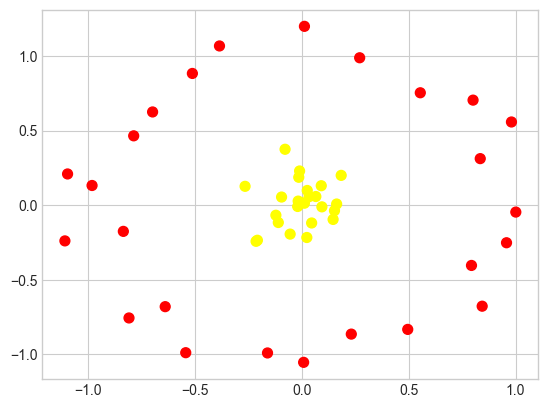

In [6]:
from mpl_toolkits import mplot3d

X, y = make_circles(50, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

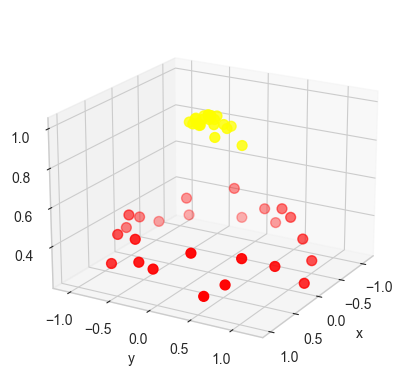

In [7]:
# Sử dụng hàm radial basis function và vẽ dữ liệu trong không gian 3 chiều
r = np.exp(-(X**2).sum(1))
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.view_init(elev=20, azim=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')
plt.show()

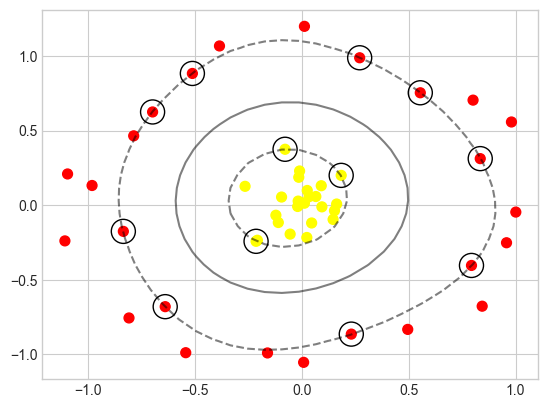

array([[-0.63738404, -0.67985034],
       [ 0.23229366, -0.86369251],
       [ 0.55474951,  0.7527327 ],
       [-0.83305604, -0.17558412],
       [ 0.27144157,  0.98716999],
       [-0.51038515,  0.88214215],
       [ 0.83489967,  0.31162967],
       [ 0.79399245, -0.40377335],
       [-0.6963618 ,  0.62424284],
       [-0.21273837, -0.24213149],
       [ 0.18506201,  0.19952941],
       [-0.07721393,  0.37434065]])

In [8]:
# Sử dụng SVC để huấn luyện mô hình SVM và vẽ các biên quyết định của SVM
model = SVC(kernel='rbf', C=1E6)
model.fit(X, y)
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, 
               linestyles=['--', '-', '--'])

    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='black',
                   facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()
model.support_vectors_

#  Tập dữ liệu banknote authentication

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [10]:
col_names = ["variance", "skewness", "curtosis", "entrophy", "class"]
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt', names=col_names, sep=",", header=None)
df

,variance,skewness,curtosis,entrophy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [11]:
# Xác định tính tuyến tính thông qua ma trận tương quan
df.corr()

,variance,skewness,curtosis,entrophy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entrophy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


In [12]:
y = df['class']
X = df.drop('class', axis=1).values

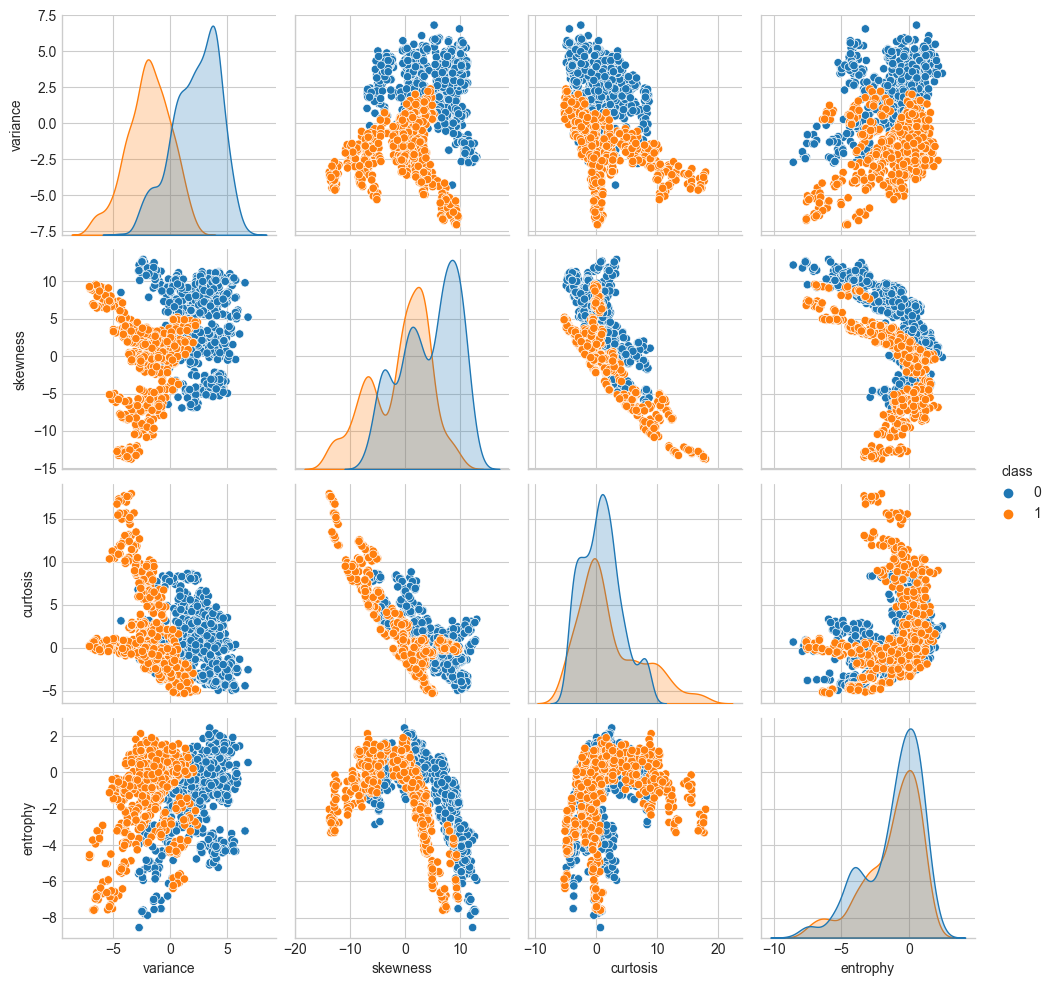

In [24]:
# Vẽ scatterplot cho từng cặp feature
sns.pairplot(df, hue='class')
plt.show()

In [14]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
xtrain_samples = X_train.shape[0]
xtest_samples = X_test.shape[0]

In [20]:
model = SVC(kernel='linear', C=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.98      0.98      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



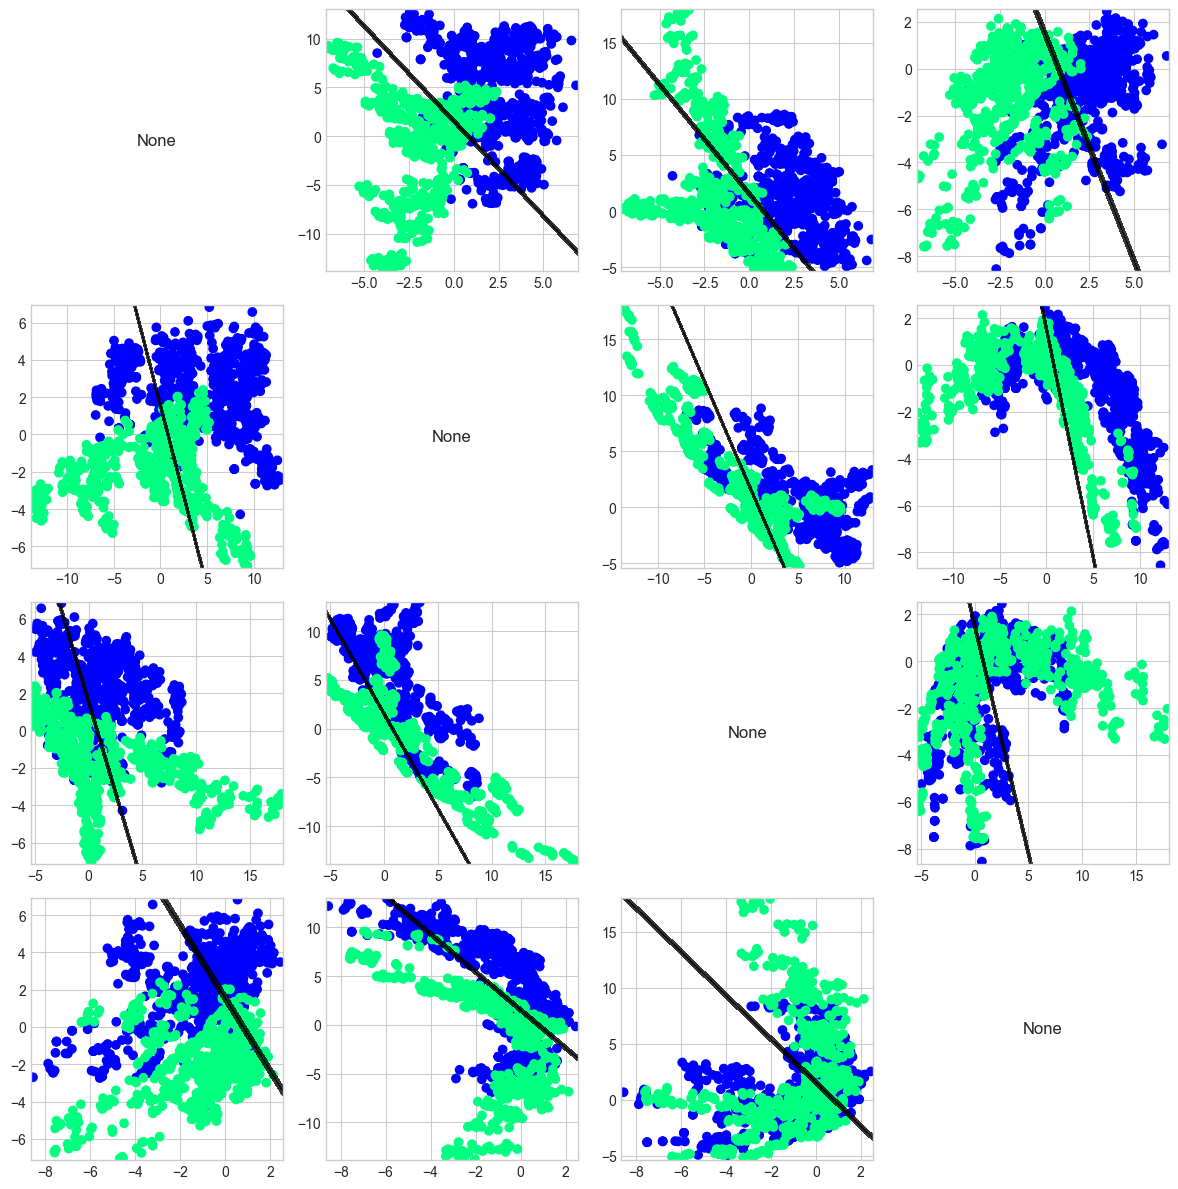

In [25]:
fig, axs = plt.subplots(4, 4, figsize=(12, 12))
for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        if i == j:
            ax.text(0.5, 0.5, f'None', fontsize=12, ha='center', va='center')
            ax.axis('off')
        else:
            ax.scatter(X[:, i], X[:, j], c=y, cmap='winter')

            x_min, x_max = X[:, i].min() - 0.1, X[:, i].max() + 0.1
            y_min, y_max = X[:, j].min() - 0.1, X[:, j].max() + 0.1
            
            xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

            xy = np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())]  # Sử dụng tất cả các features
            
            Z = model.decision_function(xy).reshape(xx.shape)
            
            ax.contourf(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.8, 
               linestyles=['--', '-', '--'])
            
            
        

plt.tight_layout()
plt.show()